In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### LightGBM

In [2]:
df_train = pd.read_csv('../data/train_con_features_encoded.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features_encoded.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,...,anio,mes,antiguedad_dividido_4,precio_prom_antiguedad,precio_prom_habitaciones,metroscubiertos_dividido_5,precio_prom_metroscubiertos,tipodepropiedad_cb,ciudad_cb,provincia_cb
0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,...,2015,8,2.0,2.461230e+06,1.616900e+06,16.0,1.277041e+06,2.763765e+06,3.384582e+06,3.471689e+06
1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,...,2013,6,2.0,2.461230e+06,2.769607e+06,53.0,3.843675e+06,2.898908e+06,4.604780e+06,3.471689e+06
2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,...,2015,10,1.0,2.385603e+06,2.769607e+06,28.0,2.039462e+06,2.398159e+06,8.890818e+05,2.367701e+06
3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,...,2012,3,0.0,2.536993e+06,1.616900e+06,12.0,8.821065e+05,2.398159e+06,1.479134e+06,2.762459e+06
4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,...,2016,6,2.0,2.461230e+06,1.616900e+06,19.0,1.574144e+06,2.763765e+06,2.749654e+06,2.367701e+06


In [3]:
#Guardo y remuevo la columna id de los datos
id_col = df_test['id']
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

#Separo features de entrenamiento del precio
feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

'''#En caso de usar el set de Maxi
feature_cols.remove('titulo')
feature_cols.remove('descripcion')
feature_cols.remove('direccion')
feature_cols.remove('tipodepropiedad')
feature_cols.remove('ciudad')
feature_cols.remove('provincia')
feature_cols.remove('fecha')'''

X = df_train[feature_cols]
y = df_train['precio']

feature_cols

['antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'gimnasio',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'moderno_descripcion',
 'hermoso_descripcion',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'antiguedad_dividido_4',
 'precio_prom_antiguedad',
 'precio_prom_habitaciones',
 'metroscubiertos_dividido_5',
 'precio_prom_metroscubiertos',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 39) (180000,)
(60000, 39) (60000,)


In [5]:
import lightgbm as lgb
from sklearn import metrics

#Se hizo una pasada para detectar ajustar hiperparametros y se mejoró manualmente
'''clf = lgb.LGBMRegressor()

gridParams = {
    'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'min_data_in_leaf':[10],
    'metric':['mae']
    }

grid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid.fit(X_train,y_train)

grid.best_params_'''

"clf = lgb.LGBMRegressor()\n\n#ajustar\ngridParams = {\n    'learning_rate': [0.05],\n    'num_leaves': [90,200],\n    'boosting_type' : ['gbdt'],\n    'objective' : ['regression'],\n    'max_depth' : [5,6,7,8],\n    'random_state' : [501], \n    'colsample_bytree' : [0.5,0.7],\n    'min_data_in_leaf':[10],\n    'metric':['mae']\n    }\n\ngrid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)\ngrid.fit(X_train,y_train)\n\ngrid.best_params_"

In [6]:
best_params = {
    'learning_rate': 0.04,      #best=0.04   
    'num_leaves': 512,          #best=512    MAE=520662  CATBOOST ENCODED ---> k=40
    'max_depth' : 12,           #best=12     MAE=XXXXXX  CATBOOST(ciudades) + ONE HOT ENCODED ---> k=70
    'objective' : 'regression', #            
    'random_state' : 501,       #best=501   
    'colsample_bytree' : 0.5,   #best=0.5
    'min_data_in_leaf':10,      #best=10
    'metric':['mae']
    }

In [7]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

LightGBM = lgb.train(best_params, lgb_train, num_boost_round=1500, valid_sets=lgb_eval, early_stopping_rounds=20)

[1]	valid_0's l1: 1.57321e+06
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l1: 1.52845e+06
[3]	valid_0's l1: 1.48549e+06
[4]	valid_0's l1: 1.4429e+06
[5]	valid_0's l1: 1.40142e+06
[6]	valid_0's l1: 1.36195e+06
[7]	valid_0's l1: 1.32411e+06
[8]	valid_0's l1: 1.28878e+06
[9]	valid_0's l1: 1.25578e+06
[10]	valid_0's l1: 1.22445e+06
[11]	valid_0's l1: 1.19404e+06
[12]	valid_0's l1: 1.16469e+06
[13]	valid_0's l1: 1.13699e+06
[14]	valid_0's l1: 1.11041e+06
[15]	valid_0's l1: 1.08516e+06
[16]	valid_0's l1: 1.0612e+06
[17]	valid_0's l1: 1.03862e+06
[18]	valid_0's l1: 1.0187e+06
[19]	valid_0's l1: 998451
[20]	valid_0's l1: 978844
[21]	valid_0's l1: 961898
[22]	valid_0's l1: 944328
[23]	valid_0's l1: 929748
[24]	valid_0's l1: 913263
[25]	valid_0's l1: 898303
[26]	valid_0's l1: 883286
[27]	valid_0's l1: 869837
[28]	valid_0's l1: 856744
[29]	valid_0's l1: 843893
[30]	valid_0's l1: 831789
[31]	valid_0's l1: 819887
[32]	valid_0's l1: 809100
[33]	valid_0's l1: 799997
[34

[303]	valid_0's l1: 544865
[304]	valid_0's l1: 544823
[305]	valid_0's l1: 544767
[306]	valid_0's l1: 544741
[307]	valid_0's l1: 544675
[308]	valid_0's l1: 544575
[309]	valid_0's l1: 544485
[310]	valid_0's l1: 544393
[311]	valid_0's l1: 544334
[312]	valid_0's l1: 544210
[313]	valid_0's l1: 544134
[314]	valid_0's l1: 544109
[315]	valid_0's l1: 543975
[316]	valid_0's l1: 543931
[317]	valid_0's l1: 543904
[318]	valid_0's l1: 543821
[319]	valid_0's l1: 543777
[320]	valid_0's l1: 543678
[321]	valid_0's l1: 543615
[322]	valid_0's l1: 543595
[323]	valid_0's l1: 543560
[324]	valid_0's l1: 543476
[325]	valid_0's l1: 543371
[326]	valid_0's l1: 543282
[327]	valid_0's l1: 543246
[328]	valid_0's l1: 543191
[329]	valid_0's l1: 543069
[330]	valid_0's l1: 543031
[331]	valid_0's l1: 542903
[332]	valid_0's l1: 542813
[333]	valid_0's l1: 542808
[334]	valid_0's l1: 542729
[335]	valid_0's l1: 542667
[336]	valid_0's l1: 542617
[337]	valid_0's l1: 542599
[338]	valid_0's l1: 542558
[339]	valid_0's l1: 542519
[

[610]	valid_0's l1: 532201
[611]	valid_0's l1: 532182
[612]	valid_0's l1: 532144
[613]	valid_0's l1: 532132
[614]	valid_0's l1: 532114
[615]	valid_0's l1: 532108
[616]	valid_0's l1: 532057
[617]	valid_0's l1: 532054
[618]	valid_0's l1: 532023
[619]	valid_0's l1: 532005
[620]	valid_0's l1: 531956
[621]	valid_0's l1: 531945
[622]	valid_0's l1: 531908
[623]	valid_0's l1: 531867
[624]	valid_0's l1: 531866
[625]	valid_0's l1: 531858
[626]	valid_0's l1: 531851
[627]	valid_0's l1: 531853
[628]	valid_0's l1: 531843
[629]	valid_0's l1: 531788
[630]	valid_0's l1: 531745
[631]	valid_0's l1: 531740
[632]	valid_0's l1: 531740
[633]	valid_0's l1: 531715
[634]	valid_0's l1: 531706
[635]	valid_0's l1: 531662
[636]	valid_0's l1: 531655
[637]	valid_0's l1: 531612
[638]	valid_0's l1: 531609
[639]	valid_0's l1: 531596
[640]	valid_0's l1: 531597
[641]	valid_0's l1: 531566
[642]	valid_0's l1: 531554
[643]	valid_0's l1: 531523
[644]	valid_0's l1: 531521
[645]	valid_0's l1: 531502
[646]	valid_0's l1: 531486
[

[915]	valid_0's l1: 526884
[916]	valid_0's l1: 526885
[917]	valid_0's l1: 526868
[918]	valid_0's l1: 526873
[919]	valid_0's l1: 526830
[920]	valid_0's l1: 526798
[921]	valid_0's l1: 526797
[922]	valid_0's l1: 526789
[923]	valid_0's l1: 526772
[924]	valid_0's l1: 526720
[925]	valid_0's l1: 526706
[926]	valid_0's l1: 526681
[927]	valid_0's l1: 526676
[928]	valid_0's l1: 526682
[929]	valid_0's l1: 526658
[930]	valid_0's l1: 526655
[931]	valid_0's l1: 526654
[932]	valid_0's l1: 526636
[933]	valid_0's l1: 526634
[934]	valid_0's l1: 526637
[935]	valid_0's l1: 526628
[936]	valid_0's l1: 526622
[937]	valid_0's l1: 526637
[938]	valid_0's l1: 526626
[939]	valid_0's l1: 526610
[940]	valid_0's l1: 526593
[941]	valid_0's l1: 526579
[942]	valid_0's l1: 526577
[943]	valid_0's l1: 526579
[944]	valid_0's l1: 526581
[945]	valid_0's l1: 526587
[946]	valid_0's l1: 526583
[947]	valid_0's l1: 526572
[948]	valid_0's l1: 526565
[949]	valid_0's l1: 526561
[950]	valid_0's l1: 526545
[951]	valid_0's l1: 526533
[

[1212]	valid_0's l1: 524055
[1213]	valid_0's l1: 524046
[1214]	valid_0's l1: 524034
[1215]	valid_0's l1: 524019
[1216]	valid_0's l1: 524017
[1217]	valid_0's l1: 524018
[1218]	valid_0's l1: 524008
[1219]	valid_0's l1: 523998
[1220]	valid_0's l1: 523990
[1221]	valid_0's l1: 523986
[1222]	valid_0's l1: 523985
[1223]	valid_0's l1: 523983
[1224]	valid_0's l1: 523981
[1225]	valid_0's l1: 523983
[1226]	valid_0's l1: 523966
[1227]	valid_0's l1: 523958
[1228]	valid_0's l1: 523955
[1229]	valid_0's l1: 523941
[1230]	valid_0's l1: 523946
[1231]	valid_0's l1: 523936
[1232]	valid_0's l1: 523932
[1233]	valid_0's l1: 523898
[1234]	valid_0's l1: 523893
[1235]	valid_0's l1: 523879
[1236]	valid_0's l1: 523866
[1237]	valid_0's l1: 523853
[1238]	valid_0's l1: 523846
[1239]	valid_0's l1: 523826
[1240]	valid_0's l1: 523806
[1241]	valid_0's l1: 523801
[1242]	valid_0's l1: 523763
[1243]	valid_0's l1: 523749
[1244]	valid_0's l1: 523747
[1245]	valid_0's l1: 523732
[1246]	valid_0's l1: 523728
[1247]	valid_0's l1:

In [8]:
LightGBM_pred = LightGBM.predict(X_test, num_iteration=LightGBM.best_iteration)

In [9]:
from sklearn.metrics import mean_absolute_error

LightGBM_mae = mean_absolute_error(y_test, LightGBM_pred)
LightGBM_mae_train = mean_absolute_error(y_train, LightGBM.predict(X_train, num_iteration=LightGBM.best_iteration))
print(f"LightGBM (train): {LightGBM_mae_train:.5f}")
print(f"LightGBM: {LightGBM_mae:.5f}")
print("------------------------------")

LightGBM (train): 239689.74704
LightGBM: 522596.98042
------------------------------


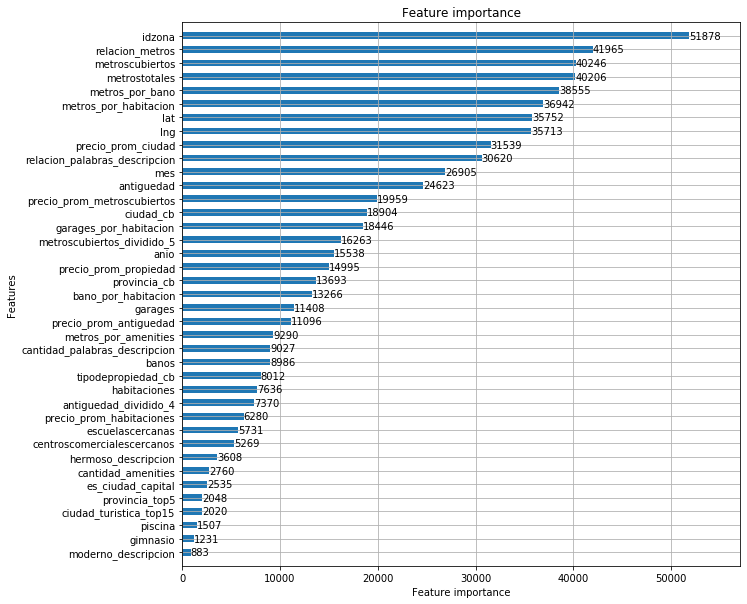

In [10]:
ax = lgb.plot_importance(LightGBM, height=0.5)
fig = ax.figure
fig.set_size_inches(10, 10)

In [11]:
LightGBM_pred_submit = LightGBM.predict(df_test, num_iteration=LightGBM.best_iteration)

LightGBMError: The number of features in data (38) is not the same as it was in training data (39).

In [ ]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = id_col
resultado_submit['target'] = LightGBM_pred_submit
display(resultado_submit.head())
resultado_submit.to_csv('../data/submitLightGBM.csv',index=False)

#### Score en Kaggle (features => score):
 **1.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***573846.94092*** con 'learning_rate': 0.03,
    'num_leaves': 256,
    'objective' : 'regression',
    'max_depth' : 12,
    'random_state' : 501, 
    'colsample_bytree' : 0.7,
    'subsample' : 0.7,
    'min_split_gain' : 0.01,
    'min_data_in_leaf':10,
***LOCAL MAE: 568518.75474***

 **2.** ***Usando CatBoost encoded y k=30*** y ['antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'gimnasio',
 'piscina',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***532012.21935*** con 'learning_rate': 0.04,
    'num_leaves': 512,
    'objective' : 'regression',
    'max_depth' : 12,
    'random_state' : 501, 
    'colsample_bytree' : 0.5,
    'min_data_in_leaf':10,
***LOCAL MAE: 522286.09996***